In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Read and filter out duplicated and bad objects.

In [18]:
#in the order that corresponds to the catalogues. 
g1s = [-.02,-.015,-.01,-.005,0.,.005,.01,.015,.02]

In [21]:
#this new LSST set of catalogues has g1 = .02 , g2 = 0.0 ; we will be using this one from now on. 
#this only excludes object that are duplicated and whose snr_grp are problematic.

main_catsLSST = []  
for key in ['Ffinal_fitsLSST1','Ffinal_fitsLSST2','Ffinal_fitsLSST3','Ffinal_fitsLSST4','Ffinal_fitsLSST5','Ffinal_fitsLSST6','Ffinal_fitsLSST7','Ffinal_fitsLSST8','Ffinal_fitsLSST9']:
    results = fits.open(files[key])
    main_catsLSST.append(not_bad(get_non_duplicated_cat(Table.read(results,hdu=1)))) #assume not many objects are duplicated/bad.
    print('reading {}'.format(key))

reading Ffinal_fitsLSST1
reading Ffinal_fitsLSST2
reading Ffinal_fitsLSST3
reading Ffinal_fitsLSST4
reading Ffinal_fitsLSST5
reading Ffinal_fitsLSST6
reading Ffinal_fitsLSST7
reading Ffinal_fitsLSST8
reading Ffinal_fitsLSST9


# Median shear bias of Purity and SNR bins 

## Plotting 

### All galaxies,  snr_grpf, b(g1) blending on 

In [81]:
cat = main_catsLSST[0]

min snr, max snr: 5.4652e-06 23295.0
snrs [1, 2, 4, 8, 16, 32, 64, 128, 23295.023]
just to check that symmetry is respected print both percentiles: [ 0.00210929  0.00189368]
just to check that symmetry is respected print both percentiles: [ 0.00061188  0.00063129]
just to check that symmetry is respected print both percentiles: [ 0.0001604   0.00017682]
just to check that symmetry is respected print both percentiles: [  7.57915247e-05   5.77436551e-05]
just to check that symmetry is respected print both percentiles: [  2.50854209e-05   2.37152562e-05]
just to check that symmetry is respected print both percentiles: [  1.27898363e-05   9.87539490e-06]
just to check that symmetry is respected print both percentiles: [  5.75582999e-06   5.48496922e-06]
just to check that symmetry is respected print both percentiles: [  1.29429083e-06   9.66679124e-07]
x_errs
[array([  0.43244338,   0.76210022,   1.44711208,   2.8150177 ,
         5.51881409,  10.96547699,  21.40054321,  91.41975403]), arr

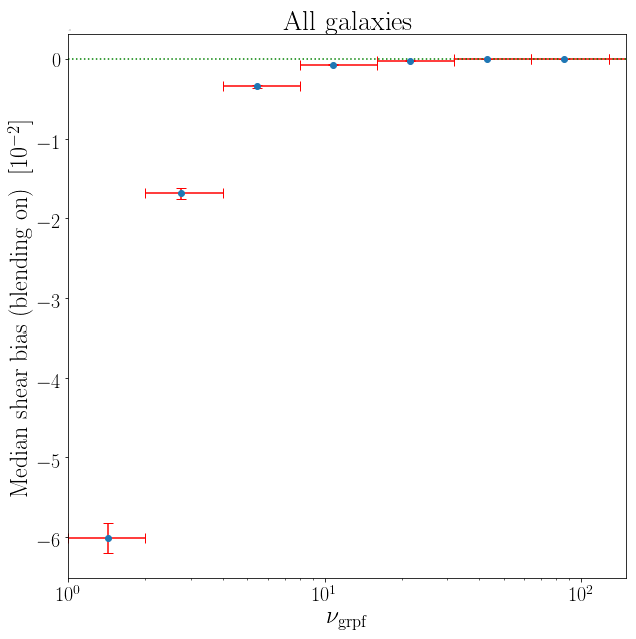

In [84]:
snrs = [2**i for i in range(0,8)]

snrs.append(np.max(cat['snr_grpf']))

xlabel= "$\\nu_{\\rm{grpf}}$"
ylabel= "\\rm{Median shear bias (blending on)} $\\; [10^{-2}]$"
title = '\\rm{All galaxies}' 


xrange = [1,150]
yrange = [-1.7e-3,.125e-3]

plot_snr_bias(cat,'bias_g1_grp',snrs, 'snr_grpf',yrange=None, xrange=xrange, 
              xlabel = xlabel , ylabel = ylabel, title = title, xlogscale = True, scientific = 'yes')

puritys [ 0.   0.2  0.4  0.6  0.8  1. ]
just to check that symmetry is respected print both percentiles: [ 0.00147856  0.0011536 ]
just to check that symmetry is respected print both percentiles: [ 0.00094355  0.00092084]
just to check that symmetry is respected print both percentiles: [ 0.00058348  0.0005522 ]
just to check that symmetry is respected print both percentiles: [ 0.000256    0.00026757]
just to check that symmetry is respected print both percentiles: [  1.21724932e-05   1.34366844e-05]
x_errs
[array([ 0.10215101,  0.10360296,  0.10732958,  0.11215034,  0.17589207]), array([ 0.09784899,  0.09639704,  0.09267042,  0.08784966,  0.02410793])]

y_errs
[0.0011536037176847445, 0.00092084426432847977, 0.00055219745263457298, 0.00026757456362247467, 1.3436684384942081e-05]

x
[ 0.10215101  0.30360296  0.50732958  0.71215034  0.97589207]

y
[-0.01544478 -0.01181173 -0.00682445 -0.0042707  -0.00027423]



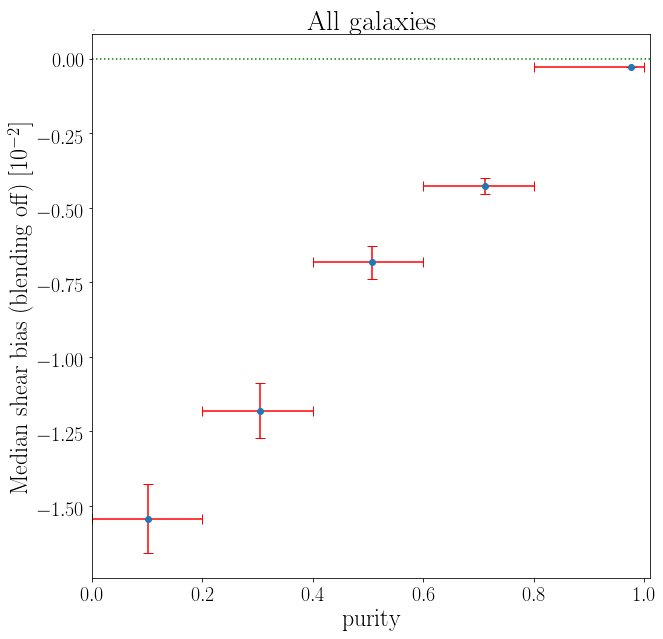

In [74]:
plot_purity_bias(cat,'bias_g1',puritys,yrange=None, xrange=xrange, 
              xlabel = xlabel , ylabel = ylabel, title = title, scientific = 'yes' )

### All galaxies with purity and b(g1) with blending on 

In [78]:
cat = main_catsLSST[0]

puritys [ 0.   0.2  0.4  0.6  0.8  1. ]
just to check that symmetry is respected print both percentiles: [ 0.00504006  0.00440053]
just to check that symmetry is respected print both percentiles: [ 0.00214185  0.00219999]
just to check that symmetry is respected print both percentiles: [ 0.00176817  0.00125005]
just to check that symmetry is respected print both percentiles: [ 0.0006724   0.00074399]
just to check that symmetry is respected print both percentiles: [  2.69572390e-05   2.31773593e-05]
x_errs
[array([ 0.10215101,  0.10360296,  0.10732958,  0.11215034,  0.17589207]), array([ 0.09784899,  0.09639704,  0.09267042,  0.08784966,  0.02410793])]

y_errs
[0.0044005322456359859, 0.0021999925374984741, 0.0012500499561429006, 0.00074399495497345924, 2.3177359253168106e-05]

x
[ 0.10215101  0.30360296  0.50732958  0.71215034  0.97589207]

y
[-0.03319016 -0.01881462 -0.0132123  -0.0085209  -0.0005782 ]



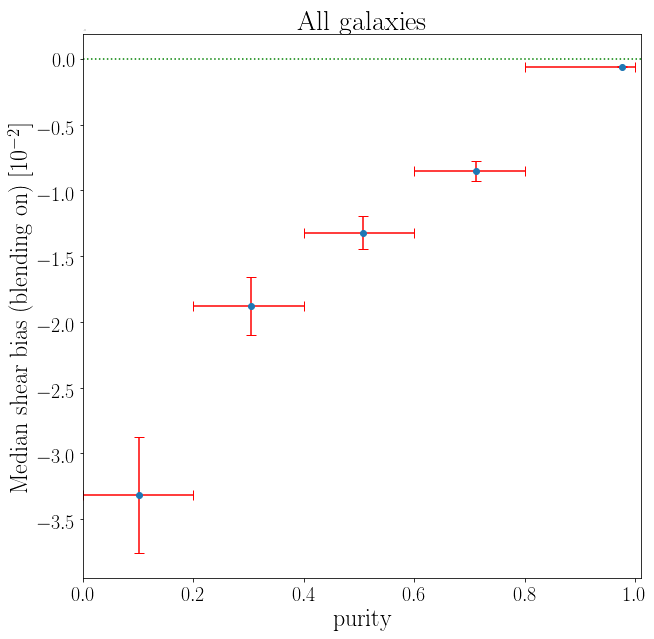

In [80]:
puritys = np.linspace(0, 1. , 6 )

xlabel= "\\rm{purity}"
ylabel= "\\rm{Median shear bias (blending on)}$\\; [10^{-2}]$"
title = '\\rm{All galaxies}' 


xrange = (0,1.01 )
yrange = [-1.7e-3,.125e-3]

plot_purity_bias(cat,'bias_g1_grp',puritys,yrange=None, xrange=xrange, 
              xlabel = xlabel , ylabel = ylabel, title = title, scientific = 'yes' )

### Lensing galaxies with snr and b(g1) with blending off 

In [59]:
cat = good(main_catsLSST[8]) 

In [60]:
snrs = [2**i for i in range(0,8)]

snrs.append(np.max(cat['snr_grpf']))

xlabel= "$\\nu_{\\rm{grpf}}$"
ylabel= "\\rm{Median shear bias}"
title = '\\rm{Lensing sample galaxies}' 


xrange = [4,128]
yrange = [5e-8,2.5e-3]

min snr_grpf, max snr_grpf: 6.00009 23278.7
bins [1, 2, 4, 8, 16, 32, 64, 128, 23278.695]
just to check that symmetry is respected print both percentiles: [  6.11420255e-05   7.73174688e-05]
just to check that symmetry is respected print both percentiles: [  1.45108643e-05   2.04720272e-05]
just to check that symmetry is respected print both percentiles: [  3.83990846e-06   4.58554714e-06]
just to check that symmetry is respected print both percentiles: [  1.78049595e-06   2.25296666e-06]
just to check that symmetry is respected print both percentiles: [  4.62329922e-07   9.08472402e-07]
just to check that symmetry is respected print both percentiles: [  1.66626049e-08   2.29973261e-08]
just to check that symmetry is respected print both percentiles: [ 0.00018785  0.00013315]
just to check that symmetry is respected print both percentiles: [  5.54745202e-05   5.61851193e-05]
just to check that symmetry is respected print both percentiles: [  2.26798258e-05   2.53448816e-05]
just to che

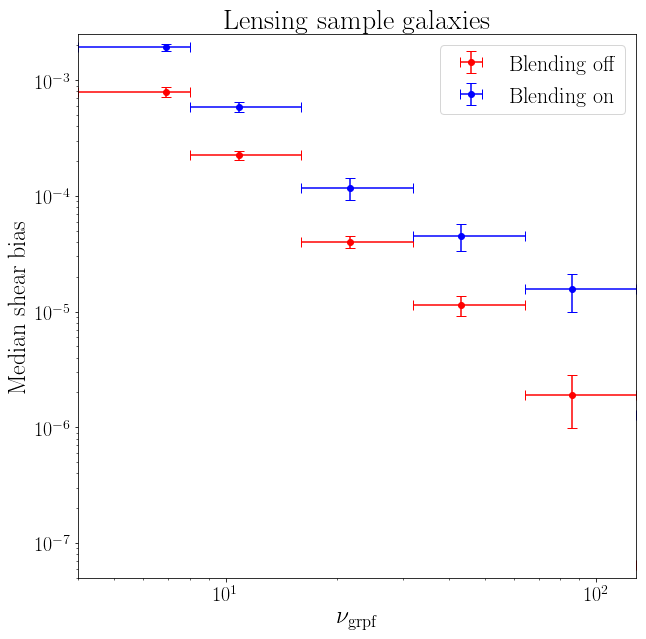

In [61]:
plot_bias_bins_both(cat,snrs, 'snr_grpf', yrange=yrange, xrange=xrange, 
              xlabel = xlabel , ylabel = ylabel, 
              title = title, xlogscale = True, ylogscale = True, scientific = False)

min snr, max snr: 6.00003 23295.0
snrs [1, 2, 4, 8, 16, 32, 64, 128, 23295.023]
just to check that symmetry is respected print both percentiles: [  7.78111746e-05   5.12172701e-05]
just to check that symmetry is respected print both percentiles: [  1.31372071e-05   1.51605927e-05]
just to check that symmetry is respected print both percentiles: [  5.36242078e-06   4.97627669e-06]
just to check that symmetry is respected print both percentiles: [  1.40354678e-06   1.46509592e-06]
just to check that symmetry is respected print both percentiles: [  5.06555239e-07   4.36843038e-07]
just to check that symmetry is respected print both percentiles: [  2.82078929e-08   1.26716486e-08]
x_errs
[array([  2.88327503,   2.89264202,   5.69487953,  11.24094772,
        21.90185547,  94.50102234]), array([  1.11672497e+00,   5.10735798e+00,   1.03051205e+01,
         2.07590523e+01,   4.20981445e+01,   2.30725215e+04])]

y_errs
[5.1217270083725452e-05, 1.516059273853898e-05, 4.9762766866479053e-06, 1.

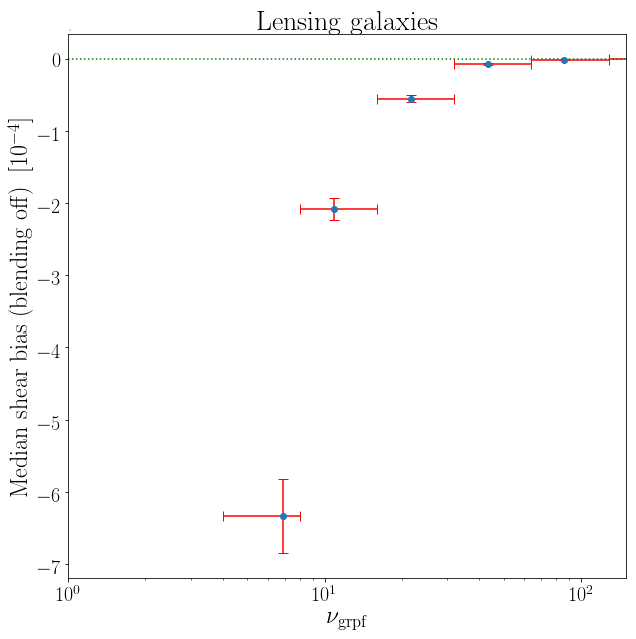

In [139]:
plot_snr_bias(cat,'bias_g1',snrs, 'snr_grpf',yrange=None, xrange=xrange, 
              xlabel = xlabel , ylabel = ylabel, title = title, xlogscale = True, scientific = True)

### Lensing galaxies with snr and b(g1) with blending on

In [140]:
cat = good(main_catsLSST[0]) 

min snr, max snr: 6.00003 23295.0
snrs [1, 2, 4, 8, 16, 32, 64, 128, 23295.023]
just to check that symmetry is respected print both percentiles: [ 0.00017867  0.00017562]
just to check that symmetry is respected print both percentiles: [  4.19829879e-05   5.85920364e-05]
just to check that symmetry is respected print both percentiles: [  2.04431562e-05   2.34591134e-05]
just to check that symmetry is respected print both percentiles: [  8.29673605e-06   1.15907314e-05]
just to check that symmetry is respected print both percentiles: [  4.80599192e-06   6.42268856e-06]
just to check that symmetry is respected print both percentiles: [  1.19612681e-06   9.57433031e-07]
x_errs
[array([  2.88327503,   2.89264202,   5.69487953,  11.24094772,
        21.90185547,  94.50102234]), array([  1.11672497e+00,   5.10735798e+00,   1.03051205e+01,
         2.07590523e+01,   4.20981445e+01,   2.30725215e+04])]

y_errs
[0.00017562007997184992, 5.8592036366462681e-05, 2.3459113435819745e-05, 1.159073144

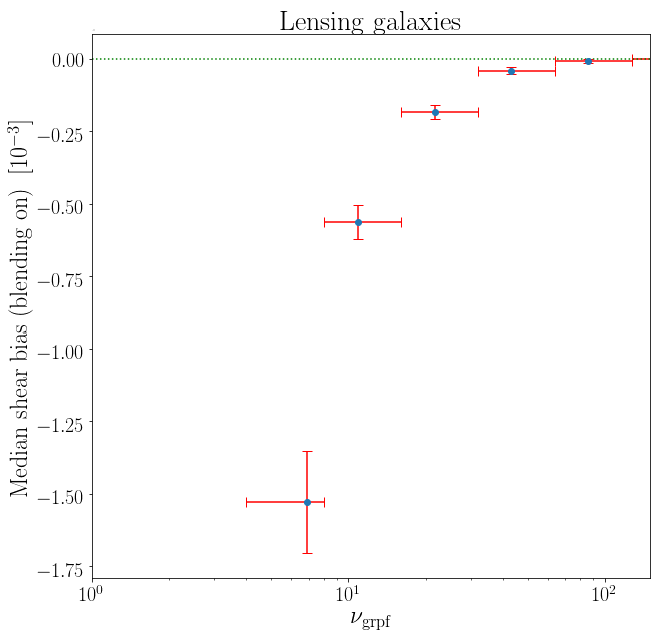

In [141]:
snrs = [2**i for i in range(0,8)]

snrs.append(np.max(cat['snr_grpf']))

xlabel= "$\\nu_{\\rm{grpf}}$"
ylabel= "\\rm{Median shear bias (blending on)} \\; [10^{-3}]$ "
title = '\\rm{Lensing galaxies}' 


xrange = [1,150]
yrange = [-1.7e-3,.125e-3]

plot_snr_bias(cat,'bias_g1_grp',snrs, 'snr_grpf',yrange=None, xrange=xrange, 
              xlabel = xlabel , ylabel = ylabel, title = title, xlogscale = True, scientific = 'yes')

### Lensing galaxies with purity and b(g1) with blending off

min purity, max purity: 0.00689361 1.0
bins [ 0.   0.2  0.4  0.6  0.8  1. ]
just to check that symmetry is respected print both percentiles: [  1.07185831e-04   4.03359591e-05]
just to check that symmetry is respected print both percentiles: [  2.97250663e-05   3.19692917e-05]
just to check that symmetry is respected print both percentiles: [  1.47255123e-05   2.59657609e-05]
just to check that symmetry is respected print both percentiles: [  8.86968337e-06   1.06508266e-05]
just to check that symmetry is respected print both percentiles: [  1.21827292e-06   1.23979669e-06]
just to check that symmetry is respected print both percentiles: [ 0.00020905  0.00024574]
just to check that symmetry is respected print both percentiles: [ 0.00018013  0.00012725]
just to check that symmetry is respected print both percentiles: [ 0.00017711  0.00017439]
just to check that symmetry is respected print both percentiles: [  6.85139967e-05   7.90493505e-05]
just to check that symmetry is respected prin

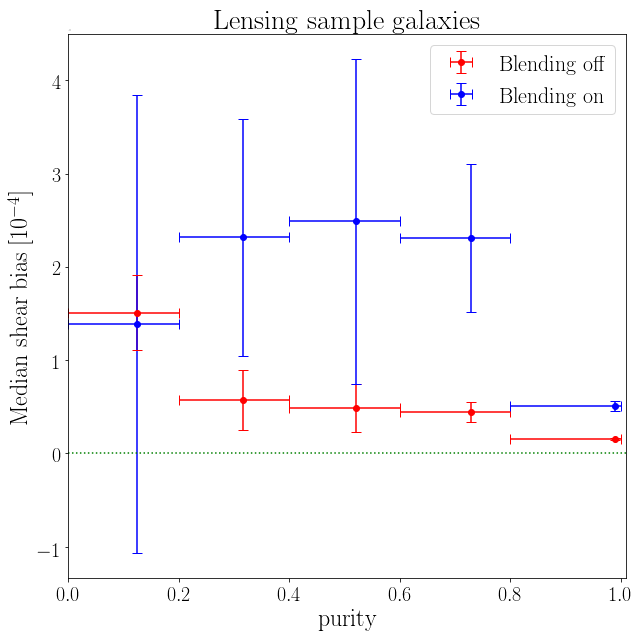

In [225]:
cat = good(main_catsLSST[8]) 

puritys = np.linspace(0, 1. , 6 )

xlabel= "\\rm{purity}"
ylabel= "\\rm{Median shear bias}$\\; [10^{-4}]$"
title = '\\rm{Lensing sample galaxies}' 


xrange = (0,1.01 )
yrange = [-1.7e-3,.125e-3]

plot_bias_bins_both(cat,puritys, 'purity', yrange=None, xrange=xrange, 
              xlabel = xlabel , ylabel = ylabel, 
              title = title, xlogscale = False, ylogscale = False, scientific = 'yes')

In [142]:
cat = good(main_catsLSST[0]) 

puritys [ 0.   0.2  0.4  0.6  0.8  1. ]
just to check that symmetry is respected print both percentiles: [  5.36175942e-05   2.69348600e-05]
just to check that symmetry is respected print both percentiles: [  3.78533441e-05   3.61620914e-05]
just to check that symmetry is respected print both percentiles: [  1.78094160e-05   1.31290690e-05]
just to check that symmetry is respected print both percentiles: [  1.38273354e-05   1.01935839e-05]
just to check that symmetry is respected print both percentiles: [  1.27273135e-06   1.15440162e-06]
x_errs
[array([ 0.12541926,  0.11717843,  0.12092934,  0.12948539,  0.19045879]), array([ 0.07458074,  0.08282157,  0.07907066,  0.07051461,  0.00954121])]

y_errs
[2.6934859988614335e-05, 3.6162091419100761e-05, 1.3129068975104019e-05, 1.0193583875661716e-05, 1.1544016160769388e-06]

x
[ 0.12541926  0.31717843  0.52092934  0.72948539  0.99045879]

y
[ -3.36879361e-06  -6.63454848e-05  -3.23517161e-05  -3.58757025e-05
  -1.26752475e-05]



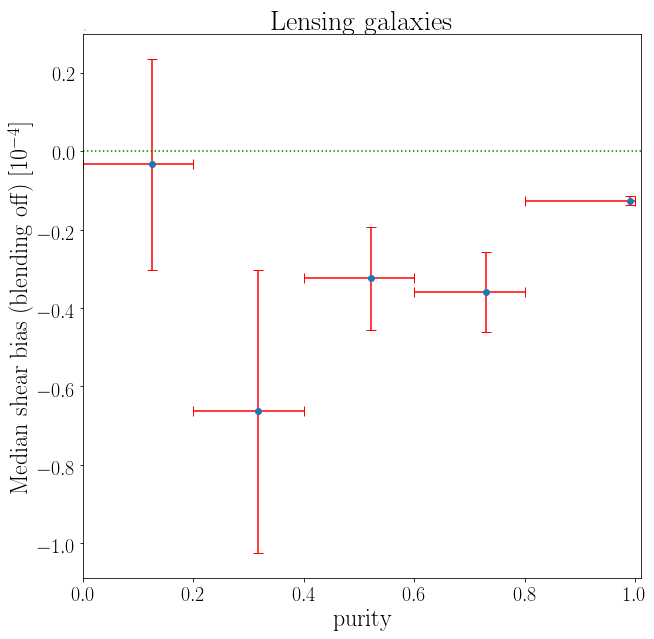

In [143]:
puritys = np.linspace(0, 1. , 6 )

xlabel= "\\rm{purity}"
ylabel= "\\rm{Median shear bias (blending off)}$\\; [10^{-4}]$"
title = '\\rm{Lensing galaxies}' 


xrange = (0,1.01 )
yrange = [-1.7e-3,.125e-3]

plot_purity_bias(cat,'bias_g1',puritys,yrange=None, xrange=xrange, 
              xlabel = xlabel , ylabel = ylabel, title = title, scientific = 'yes')

### Lensing galaxies with purity and b(g1) with blending on

In [144]:
cat = good(main_catsLSST[0]) 

puritys [ 0.   0.2  0.4  0.6  0.8  1. ]
just to check that symmetry is respected print both percentiles: [ 0.00050402  0.00012428]
just to check that symmetry is respected print both percentiles: [ 0.00023426  0.00016121]
just to check that symmetry is respected print both percentiles: [  9.78486886e-05   1.11837023e-04]
just to check that symmetry is respected print both percentiles: [  7.27666338e-05   6.68714783e-05]
just to check that symmetry is respected print both percentiles: [  5.34614082e-06   4.24047044e-06]
x_errs
[array([ 0.12541926,  0.11717843,  0.12092934,  0.12948539,  0.19045879]), array([ 0.07458074,  0.08282157,  0.07907066,  0.07051461,  0.00954121])]

y_errs
[0.0001242753496626392, 0.00016121308726724237, 0.00011183702343259931, 6.6871478338725865e-05, 4.2404704436194173e-06]

x
[ 0.12541926  0.31717843  0.52092934  0.72948539  0.99045879]

y
[ -1.99865754e-04  -1.95148474e-04  -1.37255498e-04  -1.54249763e-04
  -5.12655970e-05]



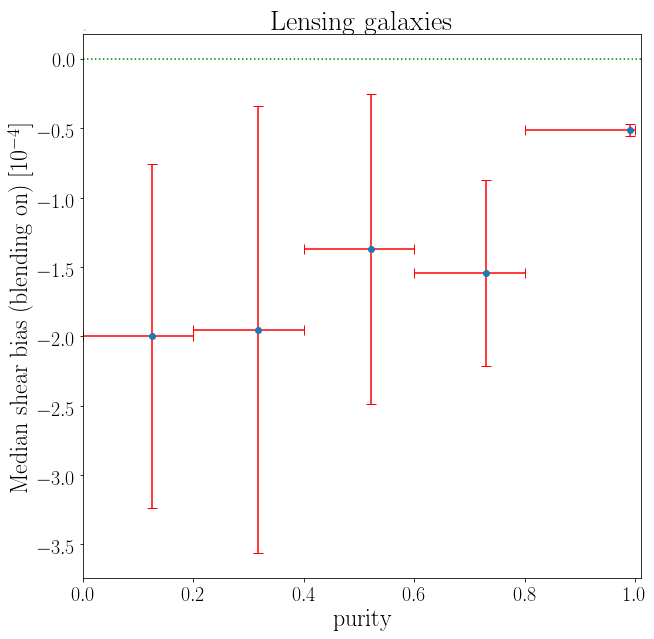

In [145]:
puritys = np.linspace(0, 1. , 6 )

xlabel= "\\rm{purity}"
ylabel= "\\rm{Median shear bias (blending on)}$\\; [10^{-4}]$"
title = '\\rm{Lensing galaxies}' 


xrange = (0,1.01 )
yrange = [-1.7e-3,.125e-3]

plot_purity_bias(cat,'bias_g1_grp',puritys,yrange=None, xrange=xrange, 
              xlabel = xlabel , ylabel = ylabel, title = title, scientific = 'yes')

### Gold galaxies with snr and b(g1) with blending off

In [88]:
cat = gold(main_catsLSST[0]) 

min snr, max snr: 0.0219983 23295.0
snrs [1, 2, 4, 8, 16, 32, 64, 128, 23295.023]
just to check that symmetry is respected print both percentiles: [ 0.00013237  0.00010601]
just to check that symmetry is respected print both percentiles: [  4.87550721e-05   4.17183375e-05]
just to check that symmetry is respected print both percentiles: [  1.87591568e-05   2.37338536e-05]
just to check that symmetry is respected print both percentiles: [  1.44534279e-05   1.23369246e-05]
just to check that symmetry is respected print both percentiles: [  6.39534846e-06   6.47999404e-06]
just to check that symmetry is respected print both percentiles: [  1.43522942e-06   1.33559462e-06]
just to check that symmetry is respected print both percentiles: [  6.92108642e-07   5.57362882e-07]
just to check that symmetry is respected print both percentiles: [  2.63853188e-08   1.40802534e-08]
x_errs
[array([  0.5480895 ,   1.00194907,   2.07930088,   3.68947792,
         5.51881409,  10.96547699,  21.40054321, 

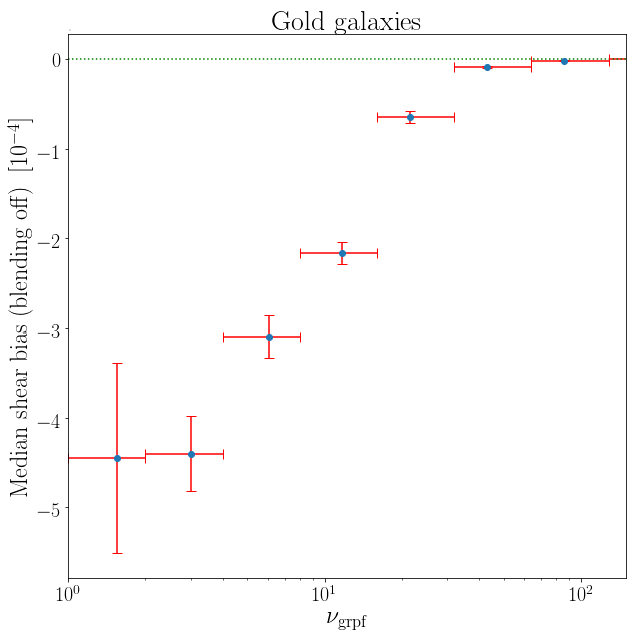

In [91]:
snrs = [2**i for i in range(0,8)]

snrs.append(np.max(cat['snr_grpf']))

xlabel= "$\\nu_{\\rm{grpf}}$"
ylabel= "\\rm{Median shear bias (blending off)} $\\; [10^{-4}]$ "
title = '\\rm{Gold galaxies}' 


xrange = [1,150]
yrange = [-1.7e-3,.125e-3]

plot_snr_bias(cat,'bias_g1',snrs, 'snr_grpf',yrange=None, xrange=xrange, 
              xlabel = xlabel , ylabel = ylabel, title = title, xlogscale = True, scientific = 'yes')

### Gold galaxies with snr and b(g1) with blending on

In [94]:
cat = gold(main_catsLSST[0]) 

min snr, max snr: 0.0219983 23295.0
snrs [1, 2, 4, 8, 16, 32, 64, 128, 23295.023]
just to check that symmetry is respected print both percentiles: [ 0.00265939  0.00193684]
just to check that symmetry is respected print both percentiles: [ 0.00073122  0.00065761]
just to check that symmetry is respected print both percentiles: [  1.26204046e-04   9.94016882e-05]
just to check that symmetry is respected print both percentiles: [  4.28670482e-05   5.87429386e-05]
just to check that symmetry is respected print both percentiles: [  2.89450696e-05   2.49480561e-05]
just to check that symmetry is respected print both percentiles: [  1.28336399e-05   9.92770219e-06]
just to check that symmetry is respected print both percentiles: [  5.62591333e-06   5.39984603e-06]
just to check that symmetry is respected print both percentiles: [  1.19638823e-06   9.15308476e-07]
x_errs
[array([  0.5480895 ,   1.00194907,   2.07930088,   3.68947792,
         5.51881409,  10.96547699,  21.40054321,  91.419754

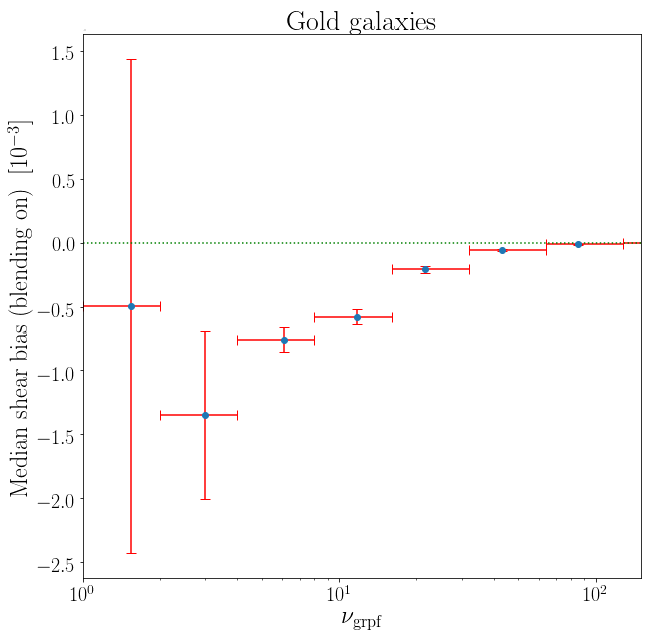

In [95]:
snrs = [2**i for i in range(0,8)]

snrs.append(np.max(cat['snr_grpf']))

xlabel= "$\\nu_{\\rm{grpf}}$"
ylabel= "\\rm{Median shear bias (blending on)} $\\; [10^{-3}]$ "
title = '\\rm{Gold galaxies}' 


xrange = [1,150]
yrange = [-1.7e-3,.125e-3]

plot_snr_bias(cat,'bias_g1_grp',snrs, 'snr_grpf',yrange=None, xrange=xrange, 
              xlabel = xlabel , ylabel = ylabel, title = title, xlogscale = True, scientific = 'yes')

### Gold galaxies with purity and b(g1) with blending off

In [96]:
cat = gold(main_catsLSST[0]) 

puritys [ 0.   0.2  0.4  0.6  0.8  1. ]
just to check that symmetry is respected print both percentiles: [  8.17271939e-05   3.91252688e-05]
just to check that symmetry is respected print both percentiles: [  4.33393725e-05   3.43482825e-05]
just to check that symmetry is respected print both percentiles: [  3.02417640e-05   2.49363403e-05]
just to check that symmetry is respected print both percentiles: [  1.79403214e-05   1.99753558e-05]
just to check that symmetry is respected print both percentiles: [  1.46655111e-06   1.51005494e-06]
x_errs
[array([ 0.11756926,  0.11153196,  0.11636529,  0.12306752,  0.1872719 ]), array([ 0.08243074,  0.08846804,  0.08363471,  0.07693248,  0.0127281 ])]

y_errs
[3.9125268813222647e-05, 3.4348282497376204e-05, 2.4936340341810134e-05, 1.9975355826318264e-05, 1.5100549353519463e-06]

x
[ 0.11756926  0.31153196  0.51636529  0.72306752  0.9872719 ]

y
[ -1.26809158e-04  -1.46562525e-04  -1.26841987e-04  -1.15462877e-04
  -1.68014139e-05]



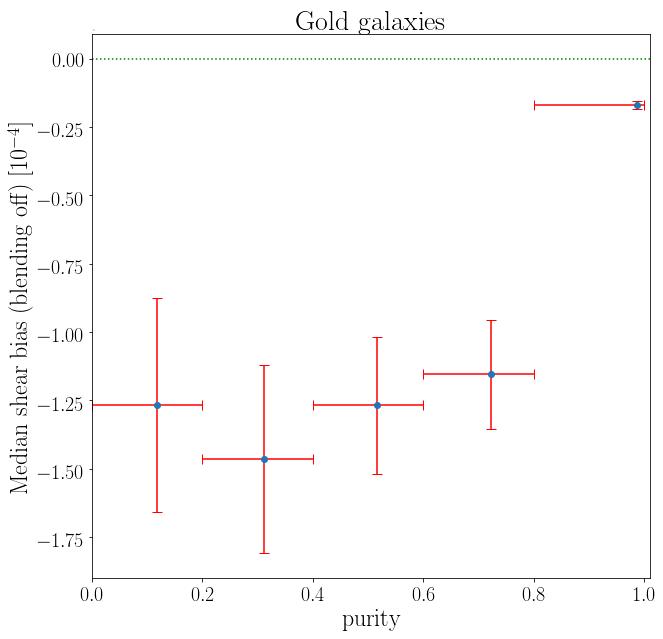

In [98]:
puritys = np.linspace(0, 1. , 6 )

xlabel= "\\rm{purity}"
ylabel= "\\rm{Median shear bias (blending off)}$\\; [10^{-4}]$"
title = '\\rm{Gold galaxies}' 


xrange = (0,1.01 )
yrange = [-1.7e-3,.125e-3]

plot_purity_bias(cat,'bias_g1',puritys,yrange=None, xrange=xrange, 
              xlabel = xlabel , ylabel = ylabel, title = title, scientific = 'yes')

### Gold galaxies with purity and b(g1) with blending on

In [146]:
cat = gold(main_catsLSST[0]) 

puritys [ 0.   0.2  0.4  0.6  0.8  1. ]
just to check that symmetry is respected print both percentiles: [ 0.0003829   0.00037386]
just to check that symmetry is respected print both percentiles: [ 0.00022849  0.00020655]
just to check that symmetry is respected print both percentiles: [ 0.00015243  0.00016217]
just to check that symmetry is respected print both percentiles: [  9.31630639e-05   8.27730837e-05]
just to check that symmetry is respected print both percentiles: [  5.43790884e-06   5.51766061e-06]
x_errs
[array([ 0.11756926,  0.11153196,  0.11636529,  0.12306752,  0.1872719 ]), array([ 0.08243074,  0.08846804,  0.08363471,  0.07693248,  0.0127281 ])]

y_errs
[0.00037385693576652557, 0.00020655046682804823, 0.00016217380471061915, 8.2773083704523742e-05, 5.5176606110762805e-06]

x
[ 0.11756926  0.31153196  0.51636529  0.72306752  0.9872719 ]

y
[ -4.05376079e-04  -2.69684533e-04  -2.76547507e-04  -1.70151368e-04
  -5.52370439e-05]



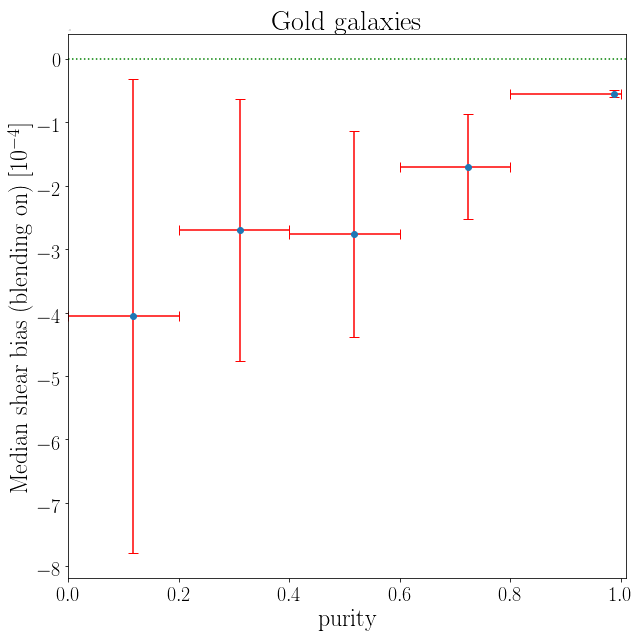

In [147]:
puritys = np.linspace(0, 1. , 6 )

xlabel= "\\rm{purity}"
ylabel= "\\rm{Median shear bias (blending on)}$\\; [10^{-4}]$"
title = '\\rm{Gold galaxies}' 


xrange = (0,1.01 )
yrange = [-1.7e-3,.125e-3]

plot_purity_bias(cat,'bias_g1_grp',puritys,yrange=None, xrange=xrange, 
              xlabel = xlabel , ylabel = ylabel, title = title, scientific = 'yes')

## By how much fraction of galaxies passing criteria for lensing sample change 

In [43]:
print len(main_catsLSST)

9


In [47]:
print len(best(good(main_catsLSST[4])))
print len(best(good(main_catsLSST[8])))

print 1 - float(len(best(good(main_catsLSST[8]))))/len(best(good(main_catsLSST[4])))

105015
104948
0.000638004094653


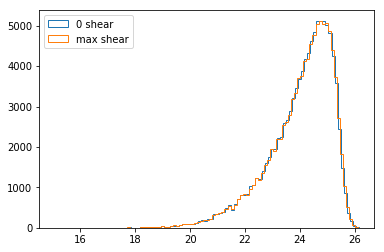

In [22]:
## also compare distribtuions of mag_AB, first just plot it

plt.hist(best(good(main_catsLSST[4]))['ab_mag'], bins=100,histtype='step',label='0 shear')
plt.hist(best(good(main_catsLSST[8]))['ab_mag'], bins=100,histtype='step',label='max shear')

plt.legend(loc=2) 



## SNR binning of isolated galaxies to potentially compare to other papers 

In [19]:
from scipy import stats

In [20]:
cat = main_catsLSST[4]
# isolated_cat = iso_gal(cat)

(array([ 106863.,   81498.,   38954.,   23225.,   16105.,   11873.,
           9132.,    7062.,    5835.,    4886.,    4204.,    3666.,
           3059.,    2727.,    2487.,    2214.,    1907.,    1808.,
           1646.,    1416.,    1326.,    1271.,    1121.,    1032.,
           1037.,     952.,     842.,     800.,     791.,     708.,
            703.,     607.,     601.,     537.,     533.,     521.,
            504.,     433.,     439.,     422.,     429.,     410.,
            397.,     332.,     334.,     311.,     319.,     306.,
            280.,     272.]),
 array([   0.,    2.,    4.,    6.,    8.,   10.,   12.,   14.,   16.,
          18.,   20.,   22.,   24.,   26.,   28.,   30.,   32.,   34.,
          36.,   38.,   40.,   42.,   44.,   46.,   48.,   50.,   52.,
          54.,   56.,   58.,   60.,   62.,   64.,   66.,   68.,   70.,
          72.,   74.,   76.,   78.,   80.,   82.,   84.,   86.,   88.,
          90.,   92.,   94.,   96.,   98.,  100.]),
 <a list of 50 Patc

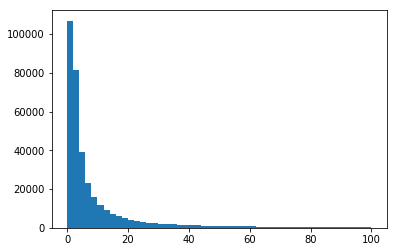

In [40]:
#histogram of snr_grpf 
plt.hist(isolated_cat['snr_grpf'],bins=50,range=(0,100))

(array([   2945.,    3960.,    5868.,   11168.,  123165.,  123229.,
          11197.,    5961.,    3964.,    2917.]),
 array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
 <a list of 10 Patch objects>)

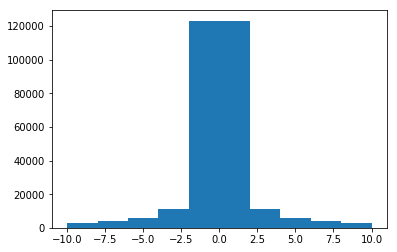

In [66]:
plt.hist(isolated_cat['bias_g1_grp'],range=(-10,10))

       None      
-----------------
6.96316556059e-06
    1.50247023582
    2.71888346672
    5.32816034317
    14.2985467148
    23287.1914062


(array([ 72192.,  72193.,  72192.,  72193.,  72192.]),
 array([  6.96316556e-06,   1.50247024e+00,   2.71888347e+00,
          5.32816034e+00,   1.42985467e+01,   2.32871914e+04]),
 <a list of 5 Patch objects>)

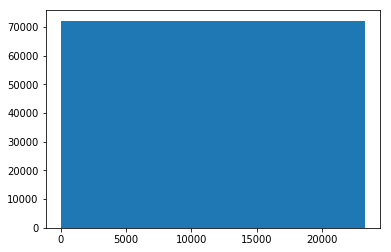

In [30]:
#cumulative snr vs galaxies to get approximately same number of galaxies per bin 
#divided number of objects into equal bins using the mquantiles fnc. 
bin_edges = stats.mstats.mquantiles(isolated_cat['snr_grpf'], [0, 1./5,2./5,3./5,4./5, 1])
print bin_edges 

plt.figure()
plt.hist(isolated_cat['snr_grpf'],bins=bin_edges)

In [ ]:
#can set it for example to have same size bins 
bins = 10 
snrs = np.linspace(10,100, bins)

In [68]:
np.round(bin_edges)

0.0
2.0
3.0
5.0
14.0
23287.0


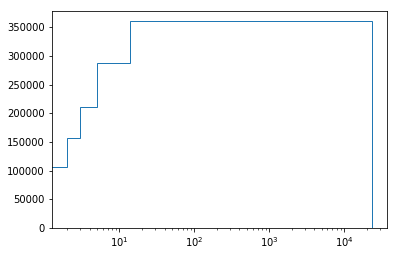

In [52]:
plt.figure()
plt.hist(isolated_cat['snr_grpf'],bins=np.round(bin_edges[:6]),histtype='step',cumulative=True)
plt.xscale('log')

In [21]:
np.min(isolated_cat['snr_grpf'])

6.9631656e-06

In [21]:
def plot_snr_bias(cat,title,param, snrs,snr_type,y_range=None,ls=None,x_range=None): 
    plt.figure()
    snr_min,snr_max = np.min(cat[snr_type]), np.max(cat[snr_type])
    print 'min snr, max snr:', (snr_min, snr_max)
    #bins = 10 
    #snrs = np.linspace(10,100, bins)
    x = []
    y = []
    errs_x1 = []
    errs_x2 = []
    #errs_y = [] 
    
    small_cats = [] 
    
    print 'snrs', snrs 
    for i in range(len(snrs)-1):
        small_cat = down_cut(up_cut(cat,snr_type,snrs[i]),snr_type,snrs[i+1])
        small_cats.append(small_cat) 
        
        median_snr = np.median(small_cat[snr_type])
        small_param = np.median(small_cat[param])
        
        #want 'error bars on x' showing the extent of the bin widths
        errs_x1.append(np.absolute(snrs[i] - median_snr))
        errs_x2.append(np.absolute(snrs[i+1] - median_snr))
        
        #print the error for this param, we want all of them to be the same 
        
        #err_y.append(np.std(abs_cut(small_cat,param,10)[param]))
        x.append(median_snr)
        y.append(small_param)
#         errs_x.append(err_x)

#     print 'y: {} '.format(y)
#     print
#     print 'err_y: {} '.format(err_y)
    
    # put the errors into a list 
    x_errs = [np.array(errs_x1),np.array(errs_x2)]
    #x_errs[1][-1] = 29.94817734 #make the last one symmetric to avoid running off plot 
    x = np.array(x)
    y = np.array(y)
    
    #get y errs, this are the error in the median shear bias calculated 
    y_errs = errs_param_boot(small_cats,param, np.median,N=1000)
        
    print 'x_errs'
    print x_errs 
    print 
    print 'y_errs'
    print y_errs 
    print 
        

    
    f = plt.figure(figsize=(12,12)) 
    ax = f.add_subplot(111)
    #ax.set_yscale('log')
    if y_range: 
        ax.set_ylim(y_range)
    if x_range: 
        ax.set_xlim(x_range)
        
        
    #ax.set_xscale('log')
    ax.set_title(title)
    
    plt.tick_params(axis='both', which='major', labelsize=20)

    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.yaxis.offsetText.set_fontsize(15)
    
    plt.axhline(y=0.0, color='g', linestyle=':')    
    
    print 'x'
    print x
    print
    print 'y'
    print y
    print
#     print'errs_x'
#     print errs_x
    if ls: 
        ax.errorbar(x,y,xerr=x_errs,marker='o',ls=ls,ecolor='r',capsize=5)
    else: 
        ax.errorbar(x,y,xerr=x_errs,yerr=y_errs,fmt='o',capsize=5,ecolor='r')

In [22]:
snrs = [2**i for i in range(-1,6)]
snrs.append(np.max(cat['snr_grpf']))
print snrs 

[0.5, 1, 2, 4, 8, 16, 32, 23287.191]


min snr, max snr: (3.5526139e-06, 23287.191)
snrs [0.5, 1, 2, 4, 8, 16, 32, 23287.191]
just to check that symmetry is respected print both percentiles: [ 0.00060562  0.00056305]
just to check that symmetry is respected print both percentiles: [ 0.00019604  0.00016429]
just to check that symmetry is respected print both percentiles: [  5.80936827e-05   8.48946860e-05]
just to check that symmetry is respected print both percentiles: [  2.37279710e-05   2.94384267e-05]
just to check that symmetry is respected print both percentiles: [  5.23013449e-06   8.85335163e-06]
just to check that symmetry is respected print both percentiles: [  3.06109223e-06   1.97372907e-06]
just to check that symmetry is respected print both percentiles: [  2.00637327e-08   4.21605120e-08]
x_errs
[array([  0.26511973,   0.43272519,   0.76242924,   1.44650698,
         2.8153019 ,   5.51130295,  29.94817734]), array([  0.23488027,   0.56727481,   1.23757076,   2.55349302,
         5.1846981 ,  10.48869705,  29.94

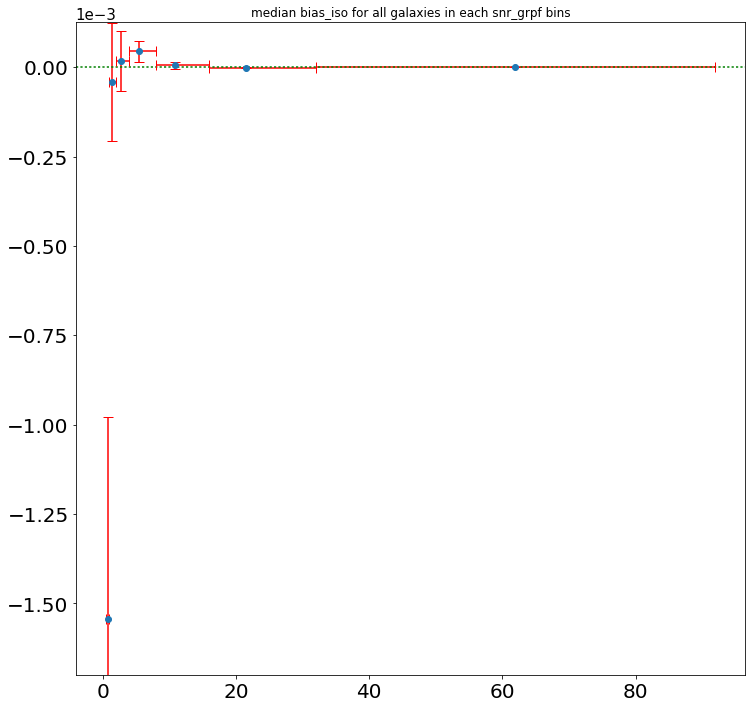

In [42]:
title = 'median bias_iso for all galaxies in each snr_grpf bins'
plot_snr_bias(cat,title,'bias_g1',snrs, 'snr_grpf',y_range=[-1.7e-3,.125e-3],ls=None,x_range=[0,100])

In [35]:
snrs
list(np.array(snrs)*2)

[1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 46574.3828125]

min snr, max snr: (0.0, 34099.602)
snrs [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 46574.3828125]
just to check that symmetry is respected print both percentiles: [ 0.00274092  0.00251565]
just to check that symmetry is respected print both percentiles: [ 0.0006336   0.00053816]
just to check that symmetry is respected print both percentiles: [ 0.0001646   0.00012545]
just to check that symmetry is respected print both percentiles: [  3.76127436e-05   3.09722263e-05]
just to check that symmetry is respected print both percentiles: [  9.88938874e-06   1.03070873e-05]
just to check that symmetry is respected print both percentiles: [  3.48226444e-06   4.71078465e-06]
just to check that symmetry is respected print both percentiles: [  1.60482980e-08   2.42930016e-08]
x_errs
[array([  0.61036634,   0.83168602,   1.47581244,   2.88019753,
         5.61940384,  11.11577225,  61.46243286]), array([  3.89633656e-01,   1.16831398e+00,   2.52418756e+00,
         5.11980247e+00,   1.03805962e+01,   2

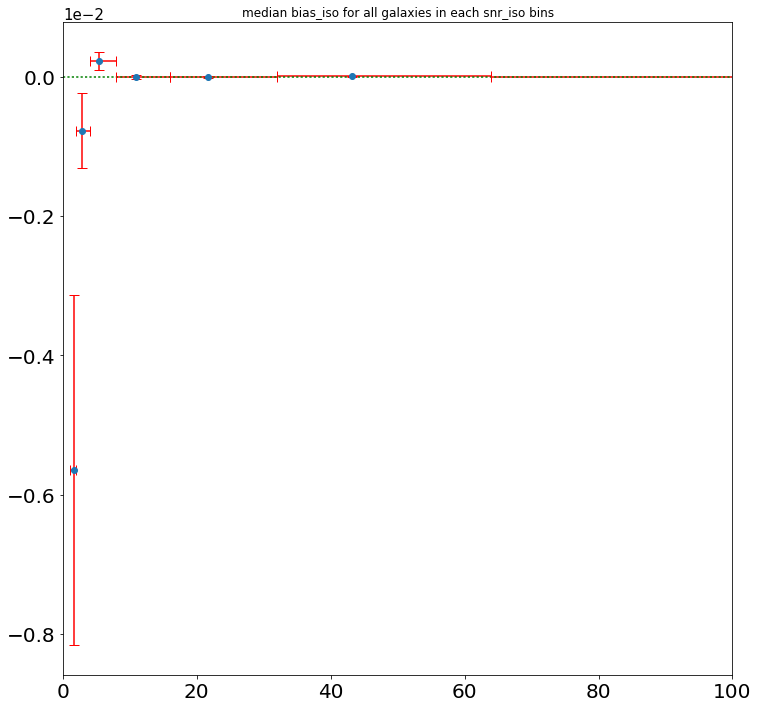

In [36]:
title = 'median bias_iso for all galaxies in each snr_iso bins'
plot_snr_bias(cat,title,'bias_g1',list(np.array(snrs)*2), 'snr_iso',x_range=[0,100])

min snr, max snr: (0.0, 33289.281)
snrs [0.5, 1, 2, 4, 8, 16, 32, 23287.191]
just to check that symmetry is respected print both percentiles: [ 0.00235504  0.00228834]
just to check that symmetry is respected print both percentiles: [ 0.00070294  0.00059388]
just to check that symmetry is respected print both percentiles: [ 0.00016639  0.00016407]
just to check that symmetry is respected print both percentiles: [  5.04274500e-05   6.10870033e-05]
just to check that symmetry is respected print both percentiles: [  1.23981997e-05   1.22665444e-05]
just to check that symmetry is respected print both percentiles: [  4.18282008e-06   3.22900803e-06]
just to check that symmetry is respected print both percentiles: [  3.11945842e-08   5.96705523e-08]
x_errs
[array([  0.32204527,   0.45573795,   0.7799387 ,   1.45232391,
         2.85511398,   5.56610489,  30.94647598]), array([  1.77954733e-01,   5.44262052e-01,   1.22006130e+00,
         2.54767609e+00,   5.14488602e+00,   1.04338951e+01,
  

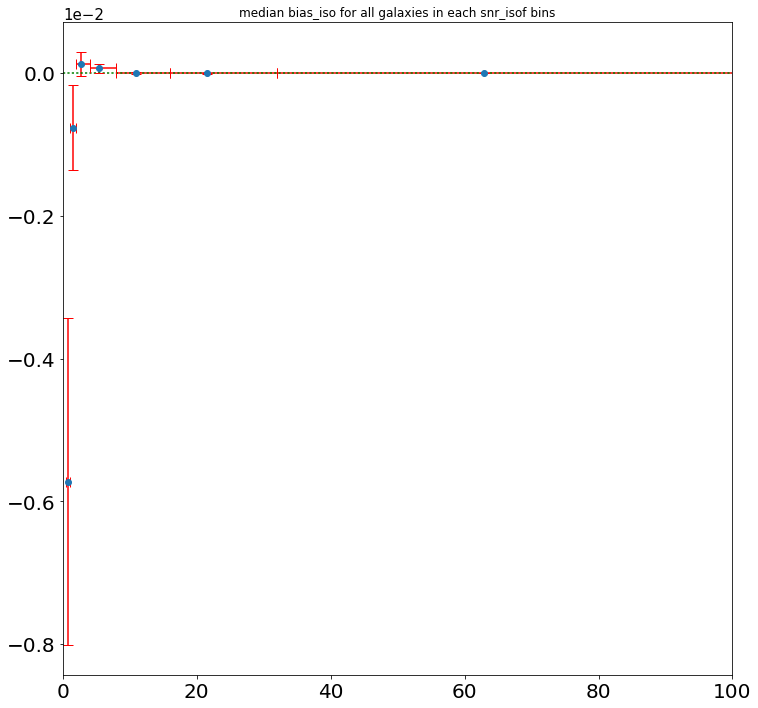

In [46]:
title = 'median bias_iso for all galaxies in each snr_isof bins'
plot_snr_bias(cat,title,'bias_g1', snrs, 'snr_isof',x_range=[0,100])

min snr, max snr: (3.5526139e-06, 23287.191)
snrs [0.05, 0.25, 0.5, 1.0, 1.5, 2, 2.5, 3, 4, 23287.191]
just to check that symmetry is respected print both percentiles: [ 0.00401216  0.00487214]
just to check that symmetry is respected print both percentiles: [ 0.00122262  0.00097295]
just to check that symmetry is respected print both percentiles: [ 0.00055592  0.00052586]
just to check that symmetry is respected print both percentiles: [ 0.00027556  0.00036563]
just to check that symmetry is respected print both percentiles: [ 0.0003541  0.000232 ]
just to check that symmetry is respected print both percentiles: [ 0.00014811  0.00017247]
just to check that symmetry is respected print both percentiles: [ 0.00016512  0.0001819 ]
just to check that symmetry is respected print both percentiles: [  8.11694138e-05   1.14603566e-04]
just to check that symmetry is respected print both percentiles: [  1.68705245e-07   3.09119202e-07]
x_errs
[array([ 0.14294539,  0.11835107,  0.26511973,  0.234

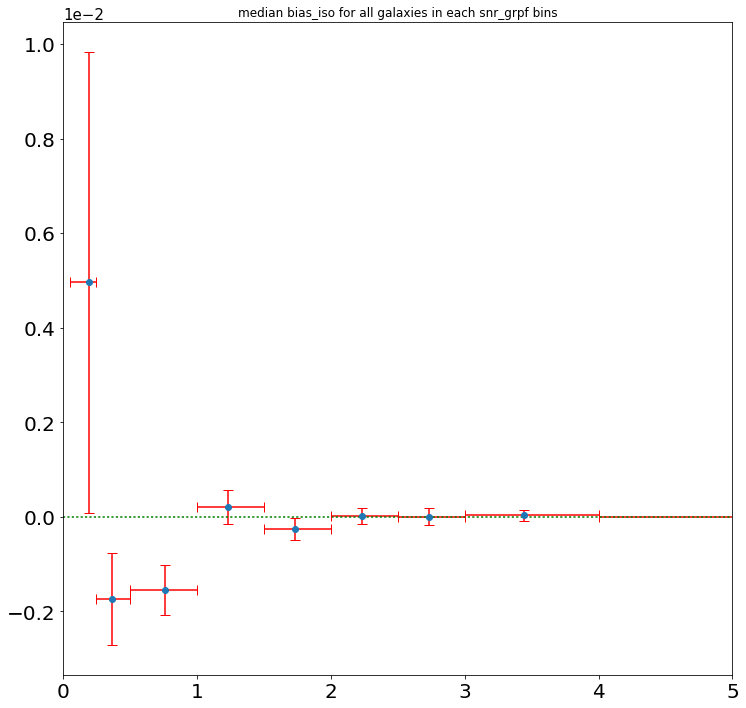

In [50]:
#let's do some finer binning to see what is happening in the very first bins 
snrs = [0.05,.25,.5,1.,1.5,2,2.5,3,4]
snrs.append(np.max(cat['snr_grpf']))
title = 'median bias_iso for all galaxies in each snr_grpf bins'
plot_snr_bias(cat,title,'bias_g1', snrs, 'snr_grpf',x_range=[0,5])


min snr, max snr: (0.0, 34099.602)
snrs [0.05, 0.25, 0.5, 1.0, 1.5, 2, 2.5, 3, 4, 23287.191]
just to check that symmetry is respected print both percentiles: [ 134.40128326  229.95523071]
just to check that symmetry is respected print both percentiles: [ 0.43938529  0.76810181]
just to check that symmetry is respected print both percentiles: [ 0.01277793  0.01383603]
just to check that symmetry is respected print both percentiles: [ 0.0059026   0.00415816]
just to check that symmetry is respected print both percentiles: [ 0.00352056  0.00288148]
just to check that symmetry is respected print both percentiles: [ 0.00203753  0.00220037]
just to check that symmetry is respected print both percentiles: [ 0.00133733  0.00130536]
just to check that symmetry is respected print both percentiles: [ 0.00059905  0.00053187]
just to check that symmetry is respected print both percentiles: [  2.21059754e-07   3.78583873e-07]
x_errs
[array([ 0.14243431,  0.13263866,  0.34341598,  0.33106506,  0.2539

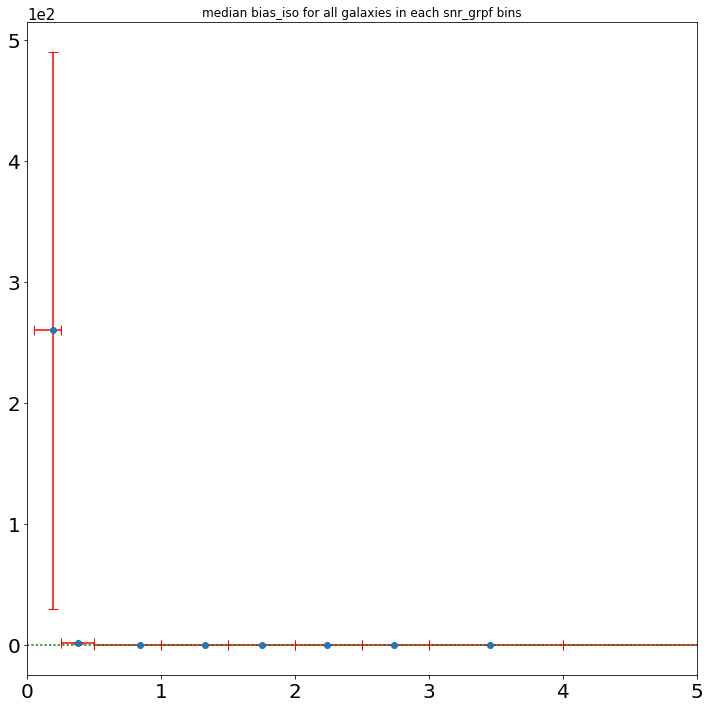

In [51]:
plot_snr_bias(cat,title,'bias_g1', snrs, 'snr_iso',x_range=[0,5])
title = 'median bias_iso for all galaxies in each snr_iso bins'

## Other...

(0, 100)

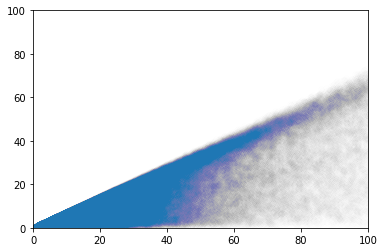

In [31]:
plt.scatter(cat['snr_iso'],cat['snr_grpf'],alpha=.005)
plt.xlim(0,100)
plt.ylim(0,100)

min snr, max snr: (3.5526139e-06, 23287.191)
snrs [0.5, 1, 2, 4, 8, 16, 32, 23287.191]
x_errs
[array([  0.26511973,   0.43272519,   0.76242924,   1.44650698,
         2.8153019 ,   5.51130295,  29.94817734]), array([  0.23488027,   0.56727481,   1.23757076,   2.55349302,
         5.1846981 ,  10.48869705,  29.94817734])]

x
[  0.76511973   1.43272519   2.76242924   5.44650698  10.8153019
  21.51130295  61.94817734]

y
[ -1.54279685e-03  -4.19176067e-05   1.76460890e-05   4.44463367e-05
   4.85986266e-06  -1.73120588e-06   2.04844994e-08]



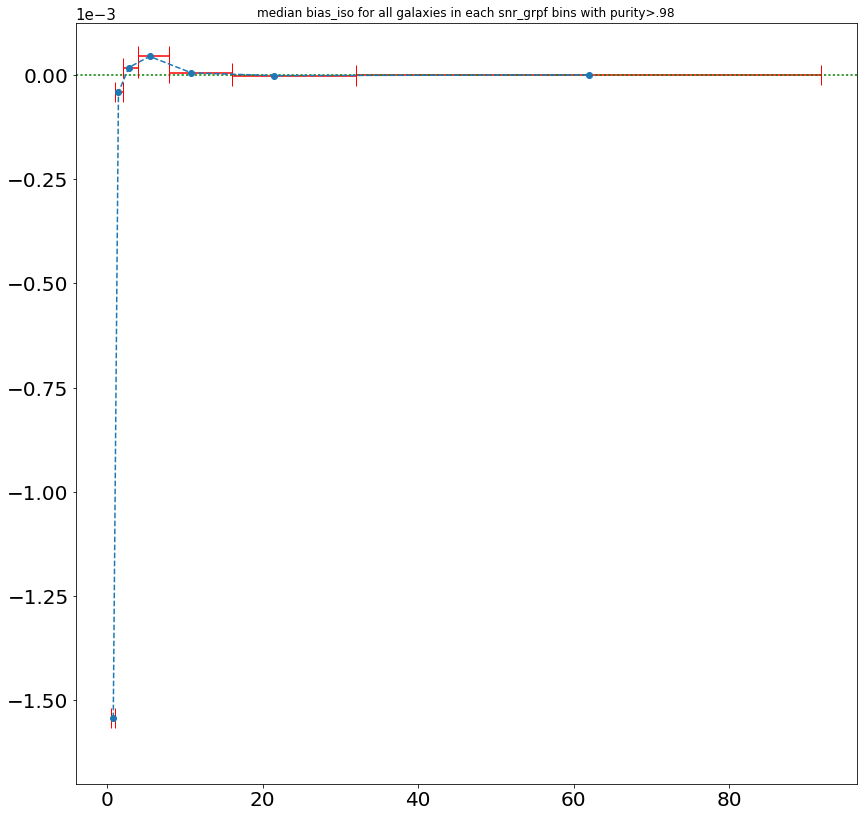

In [101]:
# cat = main_catsLSST[4]
# isolated_cat = iso_gal(cat)
# # final_bins = np.round(bin_edges)
# # final_bins = [1.95,2,7,8,9,23287]
# print 'snrs: '
# print final_bins


# title = 'median bias_grp for galaxies in each snr_grpf bins with purity>.98'
# plot_snr_bias(isolated_cat,title,'bias_g1_grp',final_bins)

# iso_cat = cat[cat['grp_size'] == 1]
# title = 'median bias_iso for galaxies in each snr_grpf bins with grp_size=1'
# plot_snr_bias(iso_cat,title,'bias_g1')

# title = 'median bias_grp for galaxies in each snr_grpf bins with grp_size=1'
# plot_snr_bias(iso_cat,title,'bias_g1_grp')


In [ ]:
#how to make the statistical significance of each bin the same?
#can we use np.std as a proxy for the error? 

3.55261e-06 23287.2
[0.00023791754, -0.00021655418, 0.00013253045, -5.0811257e-05, -0.00016252697, 5.9642953e-05, 4.4152996e-05, -0.00025313449, -0.00034184734, 9.1191241e-06, 2.3231314e-05, 1.4585296e-05, -0.00022701142, -4.6858069e-05, 0.00028618702, 0.0003024555, -6.9116072e-06, -2.4297591e-05, 4.184596e-06, 9.6272352e-06, -9.7630778e-05, 7.7119621e-05, -4.0623487e-05, -1.0150118e-05, -7.1853341e-05, 0.00020570871, -0.00015001922, 0.00026542024, -7.2085641e-05, -7.4750118e-05, -2.3081075e-06, 6.081264e-06, -7.9538891e-05, -9.055651e-05, 0.00019522097, -5.2463809e-05, 8.6244603e-05, -5.1387051e-06, 7.2244133e-05, -1.124998e-05, 5.6691977e-05, 1.421714e-05, 3.4184792e-05, -3.5662729e-06, -0.0001204392, 2.6642545e-07, -7.0111069e-05, -2.6688189e-05, -1.4423919e-05, -1.2340506e-06, -5.2612726e-05, 5.9434788e-05, 2.1301551e-06, 3.1623091e-05, 5.9210633e-05, 1.4265937e-05, -4.3959692e-05, 0.00016555138, 1.1022501e-05, 4.6243043e-05, 1.3774147e-06, 1.7790451e-05, -5.2176811e-06, -0.0001076

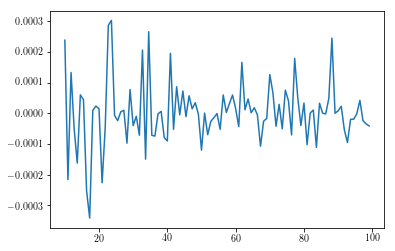

In [99]:
cat = main_catsLSST[4]
isolated_cat = iso_gal(cat)
snr_min,snr_max = np.min(cat['snr_grpf']), np.max(cat['snr_grpf'])
print snr_min, snr_max
snrs = np.linspace(10,100, 100)
y = []
for i in range(len(snrs)-1):
    small_cat = down_cut(up_cut(isolated_cat,'snr_grpf',snrs[i]),'snr_grpf',snrs[i+1])
    small_g1 = np.median(small_cat['bias_g1_grp'])
    y.append(small_g1)
print y   
plt.plot(snrs[0:99],y)

## does g2!= 0 matter? 

In [35]:
filters = [good,best]

In [36]:
results1 = fits.open('/Users/Ismael/aegis/WeakLensingDeblending/projectLSST-g1_20-g2_0/final_fits.fits')
table1 = not_bad(get_non_duplicated_cat(Table.read(results1,hdu=1)))

In [37]:
select_table1 = selection_filter([table1,main_catsLSST[4]],filters,shear_zero_cat=main_catsLSST[4])

/Users/Ismael/miniconda2/lib/python2.7/site-packages/astropy/table/table.py:2525: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  result = self.as_array() == other


In [38]:
final_table1 = select_table1[0]

In [54]:
#get their errors too bc why not: 
final_err1 = errs_param_boot([final_table1],'bias_g1', np.median)[0] 
final_err1_grp = errs_param_boot([final_table1],'bias_g1_grp', np.median)[0]  
final_err2 = errs_param_boot([final_table1],'bias_g2', np.median)[0]  
final_err2_grp = errs_param_boot([final_table1],'bias_g2_grp', np.median)[0]  

just to check that symmetry is respected print both percentiles: [  2.09058817e-06   2.05865945e-06]
just to check that symmetry is respected print both percentiles: [  5.51654375e-06   5.22874325e-06]
just to check that symmetry is respected print both percentiles: [  1.34229281e-07   1.20629168e-07]
just to check that symmetry is respected print both percentiles: [  2.72324985e-06   2.53509552e-06]


In [57]:
#errors for original cats. 
selection_cats = selection_filter(main_catsLSST,filters)
errs_LSSTgood_g1grp = errs_param_boot(selection_cats,'bias_g1_grp', np.median) 
errs_LSSTgood_g1iso = errs_param_boot(selection_cats,'bias_g1', np.median) 
errs_LSSTgood_g2grp = errs_param_boot(selection_cats,'bias_g2_grp', np.median) 
errs_LSSTgood_g2iso = errs_param_boot(selection_cats,'bias_g2', np.median) 

just to check that symmetry is respected print both percentiles: [  5.66081144e-06   4.76501009e-06]
just to check that symmetry is respected print both percentiles: [  4.99255839e-06   5.14991552e-06]
just to check that symmetry is respected print both percentiles: [  3.70730166e-06   3.81207246e-06]
just to check that symmetry is respected print both percentiles: [  4.14957289e-06   3.93914524e-06]
just to check that symmetry is respected print both percentiles: [  3.03409479e-06   2.78689924e-06]
just to check that symmetry is respected print both percentiles: [  3.33882706e-06   3.36601443e-06]
just to check that symmetry is respected print both percentiles: [  4.08738924e-06   3.84500345e-06]
just to check that symmetry is respected print both percentiles: [  4.67656355e-06   4.83145530e-06]
just to check that symmetry is respected print both percentiles: [  5.27724842e-06   4.90509774e-06]
just to check that symmetry is respected print both percentiles: [  2.46952550e-06   1.9901

In [58]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [62]:
#compare the medians from this catalogue to the other one 
print 'median bias and error g1 iso for g1 = .02, g2 = 0: {:.3g}, {:.3g}'.format(np.median(final_table1['bias_g1']),final_err1) 
print 'median bias g1 grp for g1 = .02, g2 = 0: {:.3g}, {:.3g}'.format(np.median(final_table1['bias_g1_grp']),final_err1_grp) 
print 'median bias g2 iso for g1 = .02, g2 = 0: {:.3g}, {:.3g}'.format(np.median(final_table1['bias_g2']),final_err2) 
print 'median bias g2 grp for g1 = .02, g2 = 0: {:.3g}, {:.3g}'.format(np.median(final_table1['bias_g2_grp']),final_err2_grp) 
print 
print 'median bias and error g1 iso for g1 = .02, g2 = 0.2: {:.3g}, {:.3g}'.format(np.median(selection_cats[8]['bias_g1']),errs_LSSTgood_g1iso[8]) 
print 'median bias g1 grp for g1 = .02, g2 = 0.2: {:.3g}, {:.3g}'.format(np.median(selection_cats[8]['bias_g1_grp']),errs_LSSTgood_g1grp[8]) 
print 'median bias g2 iso for g1 = .02, g2 = 0.2: {:.3g}, {:.3g}'.format(np.median(selection_cats[8]['bias_g2']),errs_LSSTgood_g2iso[8]) 
print 'median bias g2 grp for g1 = .02, g2 = 0.2: {:.3g}, {:.3g}'.format(np.median(selection_cats[8]['bias_g2_grp']),errs_LSSTgood_g2grp[8]) 





median bias and error g1 iso for g1 = .02, g2 = 0: 2.62e-05, 2.06e-06
median bias g1 grp for g1 = .02, g2 = 0: 5.23e-05, 5.23e-06
median bias g2 iso for g1 = .02, g2 = 0: -3.93e-09, 1.21e-07
median bias g2 grp for g1 = .02, g2 = 0: -1.25e-06, 2.54e-06

median bias and error g1 iso for g1 = .02, g2 = 0.2: 2.62e-05, 2.18e-06
median bias g1 grp for g1 = .02, g2 = 0.2: 5.39e-05, 4.91e-06
median bias g2 iso for g1 = .02, g2 = 0.2: 2.67e-05, 2.27e-06
median bias g2 grp for g1 = .02, g2 = 0.2: 5.39e-05, 4.87e-06


In [95]:
len(good(best(main_catsLSST[4])))

119215

In [83]:
float(len(good(main_catsLSST[4])))/len(main_catsLSST[4])

0.1824055306854245

## Investigate something about the noise 

In [ ]:
reader = descwl

(array([  10949.,   14339.,   20604.,   34772.,  200836.,  164227.,
          28312.,   16764.,   11837.,    8918.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

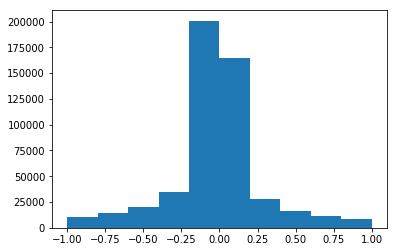

In [25]:
plt.hist(main_catsLSST[0]['bias_g1'], range=(-1, 1))

(array([   9027.,   11976.,   16873.,   28375.,  163377.,  201710.,
          35065.,   20414.,   14235.,   10916.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

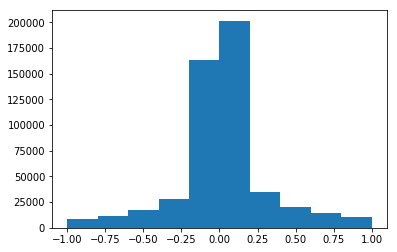

In [27]:
plt.hist(main_catsLSST[8]['bias_g1'], range=(-1, 1))

In [28]:
np.median(main_catsLSST[8]['bias_g1_grp'])

0.0019790705

# Unused functions 

In [ ]:
def plot_purity_bias(cat,param, puritys, yrange=None,xrange=None, xlabel = None, 
                  ylabel = None, ls=None,title = None, xlogscale = False, scientific = False ): 
    
    plt.rc('text', usetex = True)
    fig, ax = plt.subplots(figsize=(10,10))
    
    x = []
    y = []
    errs_x1 = []
    errs_x2 = []
    #errs_y = [] 
    
    small_cats = [] 
    
    print('puritys', puritys ) 
    for i in range(len(puritys)-1):
        small_cat = down_cut(up_cut(cat,'purity',puritys[i]),'purity',puritys[i+1])
        
        #if the cutted catalogue turns out to be empty, ignore it. 
        if len(small_cat) == 0: 
            continue 
        
        small_cats.append(small_cat) 
        
        median_purity = np.median(small_cat['purity'])
        small_param = np.median(small_cat[param])
        
        #want 'error bars on x' showing the extent of the bin widths
        errs_x1.append(np.absolute(puritys[i] - median_purity))
        errs_x2.append(np.absolute(puritys[i+1] - median_purity))
        
        #print the error for this param, we want all of them to be the same 
        x.append(median_purity)
        y.append(small_param)

    
    # put the errors into a list 
    x_errs = [np.array(errs_x1),np.array(errs_x2)]
    #x_errs[1][-1] = 1.0 #make the last one symmetric to avoid running off plot 
    x = np.array(x)
    y = np.array(y)
    
    #get y errs, this are the error in the median shear bias calculated 
    y_errs = errs_param_boot(small_cats,param, np.median,N=1000)
        
    print('x_errs')
    print(x_errs)
    print()
    print('y_errs')
    print(y_errs )
    print() 
    
    
    
    ########################################## formating ##########################################
        
    #ax.set_yscale('log')
    if xlogscale: 
        ax.set_xscale('log')
    
    if yrange: 
        ax.set_ylim(yrange)
    if xrange: 
        ax.set_xlim(xrange)
        
    ax.set_title(title, size =28)
    ax.set_xlabel(xlabel, size = 24)
    ax.set_ylabel(ylabel, size = 24)
        
    
    ax.tick_params(axis='both', which='major', labelsize=20)

    #scientfic notation. 
    if scientific == True: 
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        ax.yaxis.offsetText.set_fontsize(15)
        
    elif scientific == 'yes': 
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        ax.yaxis.offsetText.set_fontsize(1)
    
    ax.axhline(y=0.0, color='g', linestyle=':')    
    
    print('x')
    print(x)
    print() 
    print('y')
    print(y)
    print()

    if ls: 
        ax.errorbar(x,y,xerr=x_errs,marker='o',ls=ls,ecolor='r',capsize=5)
    else: 
        ax.errorbar(x,y,xerr=x_errs,yerr=y_errs,fmt='o',capsize=5,ecolor='r')

